# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

5849602249f959a4ce056bbf7c2d1fac


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    print("URL",city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=pangnirtung
Processing Record 1 of Set 1 | pangnirtung
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=guerrero negro
Processing Record 2 of Set 1 | guerrero negro
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=castro
Processing Record 3 of Set 1 | castro
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=victoria
Processing Record 4 of Set 1 | victoria
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=jamestown
Processing Record 5 of Set 1 | jamestown
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=khandyga
Processing Record 6 of Set 1 | khandyga


URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=takoradi
Processing Record 2 of Set 2 | takoradi
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=tasiilaq
Processing Record 3 of Set 2 | tasiilaq
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=kot addu
Processing Record 4 of Set 2 | kot addu
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=saskylakh
Processing Record 5 of Set 2 | saskylakh
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=krasnoselkup
Processing Record 6 of Set 2 | krasnoselkup
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=cidreira
Processing Record 7 of Set 2 | cidreira
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&AP

City not found. Skipping...
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=santiago de cao
Processing Record 5 of Set 3 | santiago de cao
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=wilmington
Processing Record 6 of Set 3 | wilmington
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=albany
Processing Record 7 of Set 3 | albany
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=salto
Processing Record 8 of Set 3 | salto
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=avarua
Processing Record 9 of Set 3 | avarua
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=avera
Processing Record 10 of Set 3 | avera
URL http://api.openweathermap.org/data/2.5/weathe

URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=buchanan
Processing Record 8 of Set 4 | buchanan
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=erdenet
Processing Record 9 of Set 4 | erdenet
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=port keats
Processing Record 10 of Set 4 | port keats
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=bam
Processing Record 11 of Set 4 | bam
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=husavik
Processing Record 12 of Set 4 | husavik
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=trinidad
Processing Record 13 of Set 4 | trinidad
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f9

URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=wahiawa
Processing Record 11 of Set 5 | wahiawa
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=wulanhaote
Processing Record 12 of Set 5 | wulanhaote
City not found. Skipping...
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=eydhafushi
Processing Record 13 of Set 5 | eydhafushi
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=santo domingo
Processing Record 14 of Set 5 | santo domingo
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=yumen
Processing Record 15 of Set 5 | yumen
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=souillac
Processing Record 16 of Set 5 | souillac
URL http://api.openweathermap.or

URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=severo-kurilsk
Processing Record 13 of Set 6 | severo-kurilsk
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=colwyn bay
Processing Record 14 of Set 6 | colwyn bay
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=katobu
Processing Record 15 of Set 6 | katobu
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=sobolevo
Processing Record 16 of Set 6 | sobolevo
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=ploemeur
Processing Record 17 of Set 6 | ploemeur
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=santa marta
Processing Record 18 of Set 6 | santa marta
URL http://api.openweathermap.org/data/2.5/weather?u

City not found. Skipping...
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=majene
Processing Record 15 of Set 7 | majene
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=deh rawud
Processing Record 16 of Set 7 | deh rawud
City not found. Skipping...
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=bhan
Processing Record 17 of Set 7 | bhan
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=monrovia
Processing Record 18 of Set 7 | monrovia
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=foki
Processing Record 19 of Set 7 | foki
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=sao joao da barra
Processing Record 20 of Set 7 | sao joao da barra
URL http://api

City not found. Skipping...
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=lata
Processing Record 18 of Set 8 | lata
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=yarmouth
Processing Record 19 of Set 8 | yarmouth
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=nachingwea
Processing Record 20 of Set 8 | nachingwea
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=kostino
Processing Record 21 of Set 8 | kostino
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=tuzha
Processing Record 22 of Set 8 | tuzha
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=kayerkan
Processing Record 23 of Set 8 | kayerkan
URL http://api.openweathermap.org/data/2.5/weather?uni

URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=neuquen
Processing Record 20 of Set 9 | neuquen
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=santiago del estero
Processing Record 21 of Set 9 | santiago del estero
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=cay
Processing Record 22 of Set 9 | cay
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=oranjemund
Processing Record 23 of Set 9 | oranjemund
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=yei
Processing Record 24 of Set 9 | yei
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=beysehir
Processing Record 25 of Set 9 | beysehir
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&AP

City not found. Skipping...
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=kabansk
Processing Record 23 of Set 10 | kabansk
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=road town
Processing Record 24 of Set 10 | road town
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=port hardy
Processing Record 25 of Set 10 | port hardy
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=iisalmi
Processing Record 26 of Set 10 | iisalmi
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=okhotsk
Processing Record 27 of Set 10 | okhotsk
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=udachnyy
Processing Record 28 of Set 10 | udachnyy
URL http://api.openweathermap.org/da

URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=dorsten
Processing Record 28 of Set 11 | dorsten
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=sarankhola
Processing Record 29 of Set 11 | sarankhola
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=hereford
Processing Record 30 of Set 11 | hereford
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=katsuura
Processing Record 31 of Set 11 | katsuura
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=sompeta
Processing Record 32 of Set 11 | sompeta
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=aransas pass
Processing Record 33 of Set 11 | aransas pass
URL http://api.openweathermap.org/data/2.5/weather?units

URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=dunedin
Processing Record 33 of Set 12 | dunedin
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=chicama
Processing Record 34 of Set 12 | chicama
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=kang
Processing Record 35 of Set 12 | kang
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=yuncheng
Processing Record 36 of Set 12 | yuncheng
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=coos bay
Processing Record 37 of Set 12 | coos bay
URL http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5849602249f959a4ce056bbf7c2d1fac&q=zverinogolovskoye
Processing Record 38 of Set 12 | zverinogolovskoye
URL http://api.openweathermap.org/data/2.5/weather?units=M

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,-65.7125,-12.00,40,20,0.00,CA,1680531946
1,guerrero negro,27.9769,-114.0611,13.51,81,98,8.00,MX,1680531946
2,castro,-24.7911,-50.0119,20.31,60,0,1.71,BR,1680531946
3,victoria,22.2855,114.1577,22.20,94,98,0.45,HK,1680531673
4,jamestown,42.0970,-79.2353,11.08,53,0,6.17,US,1680531946


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangnirtung,66.1451,-65.7125,-12.00,40,20,0.00,CA,1680531946
1,guerrero negro,27.9769,-114.0611,13.51,81,98,8.00,MX,1680531946
2,castro,-24.7911,-50.0119,20.31,60,0,1.71,BR,1680531946
3,victoria,22.2855,114.1577,22.20,94,98,0.45,HK,1680531673
4,jamestown,42.0970,-79.2353,11.08,53,0,6.17,US,1680531946


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

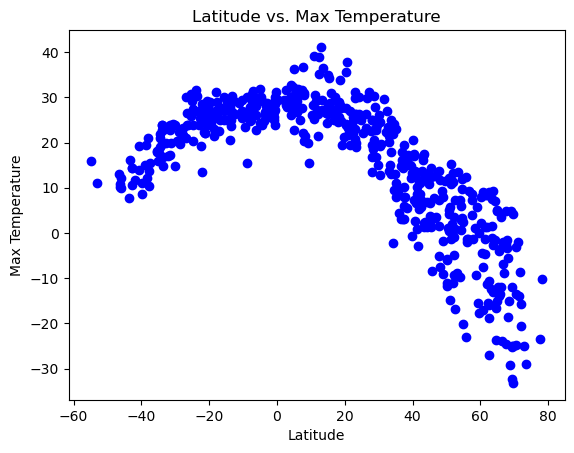

In [8]:
# Build scatter plot for latitude vs. temperature
X_axis = city_data_df["Lat"]
Y_axis = city_data_df["Max Temp"]
XYplot = plt.scatter(X_axis, Y_axis, color="blue")
# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

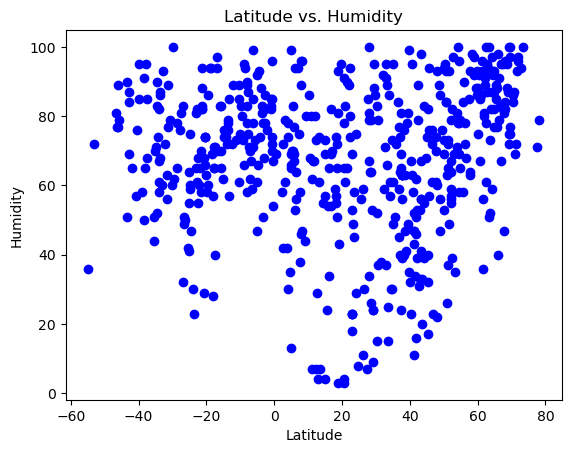

In [9]:
X_axis = city_data_df["Lat"]
Y_axis = city_data_df["Humidity"]
XYplot = plt.scatter(X_axis, Y_axis, color="blue")
# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

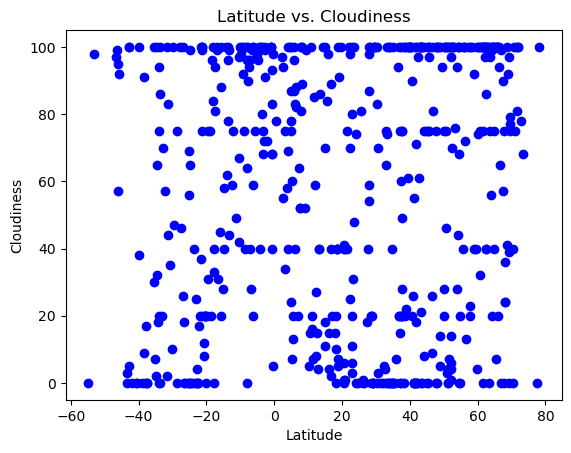

In [10]:
X_axis = city_data_df["Lat"]
Y_axis = city_data_df["Cloudiness"]
XYplot = plt.scatter(X_axis, Y_axis, color="blue")
# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

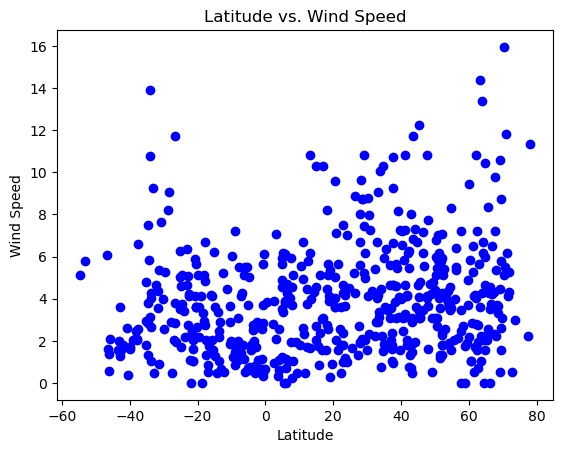

In [11]:
X_axis = city_data_df["Lat"]
Y_axis = city_data_df["Wind Speed"]
XYplot = plt.scatter(X_axis, Y_axis, color="blue")
# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(X_axis, Y_axis)
#regress_values = X_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, [
    "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangnirtung,66.1451,-65.7125,-12.00,40,20,0.00,CA,1680531946
1,guerrero negro,27.9769,-114.0611,13.51,81,98,8.00,MX,1680531946
3,victoria,22.2855,114.1577,22.20,94,98,0.45,HK,1680531673
4,jamestown,42.0970,-79.2353,11.08,53,0,6.17,US,1680531946
5,khandyga,62.6667,135.6000,-15.99,93,100,1.93,RU,1680531946


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, [
    "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,castro,-24.7911,-50.0119,20.31,60,0,1.71,BR,1680531946
6,atuona,-9.8000,-139.0333,26.28,83,98,6.03,PF,1680531946
7,port alfred,-33.5906,26.8910,22.88,68,86,4.02,ZA,1680531946
8,puerto ayora,-0.7393,-90.3518,28.98,85,68,0.45,EC,1680531947
10,punta arenas,-53.1500,-70.9167,11.01,72,98,5.80,CL,1680531776


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7567700316643757


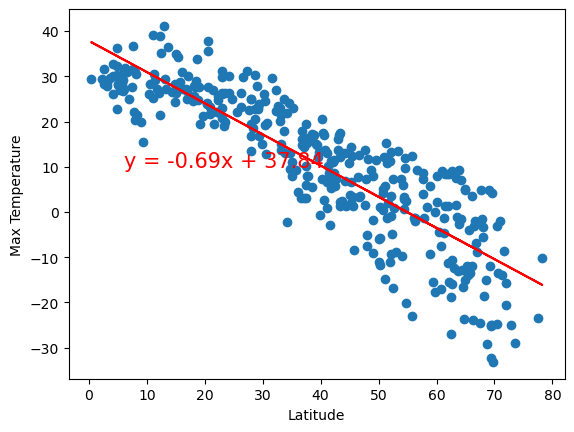

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.5808715079524901


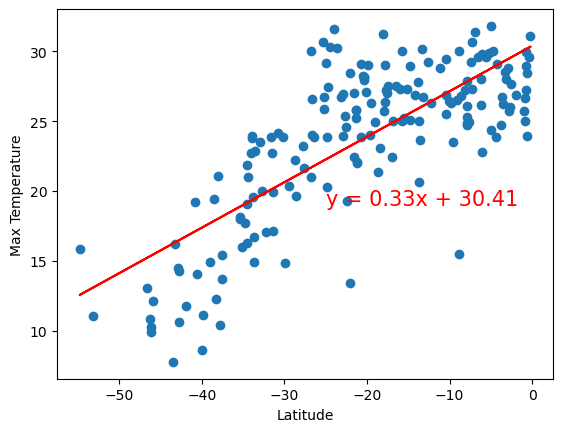

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,19),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [26]:
#NorthernHemisphere:
# a one-unit change in latitude (e.g., increase by 1 degree) results in a temperature decrease of .69 degrees.
# the "Y" value of 37.84 indicates a fixed temperature of 37.84 when latitude equals zero.

#SouthernHemisphere:
# a one-unit change in latitude (e.g., increase by 1 degree) results in a temperature increase of .33 degrees.
# the "Y" value of 30.41 indicates a fixed temperature of 30.41 when latitude equals zero.

#The R^2 values of .75 and .58 indicate a good fit of the regression line through the data (i.e., latitude is a good indicator of max temperature).

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.11557975958441433


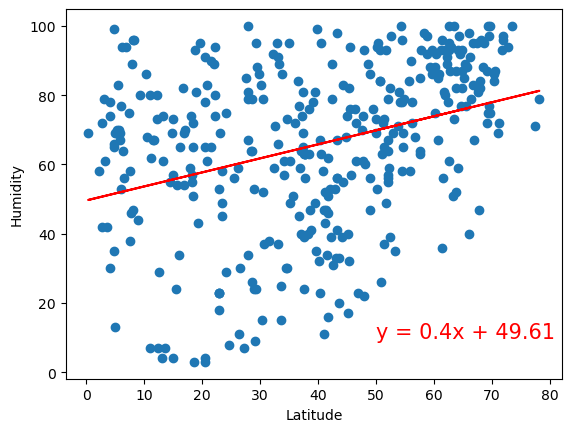

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.019172984726196777


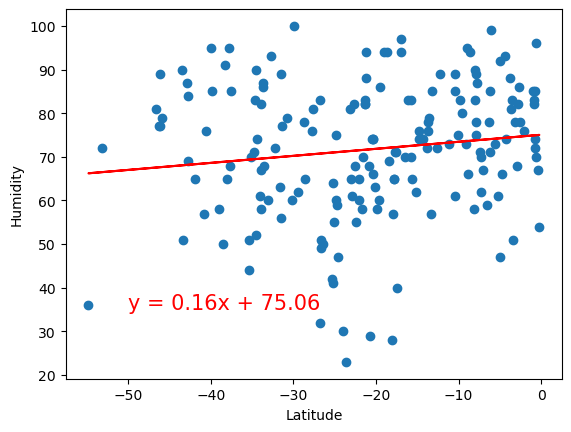

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [18]:
#NorthernHemisphere:
# a one-unit change in latitude (e.g., increase by 1 unit) results in a humidity increase of .4 units.
# the "Y" value of 49.61 indicates a fixed humidity of 49.61 when latitude equals zero.

#SouthernHemisphere:
# a one-unit change in latitude (e.g., increase by 1 unit) results in a humidity increase of .16 units.
# the "Y" value of 75.06 indicates a fixed humidity of 75.06 when latitude equals zero.

#The R^2 values of .11 and .01 indicates poor fits of the regression line through the data (i.e., latitude is a poor indicator of humidity).

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.024005617956440066


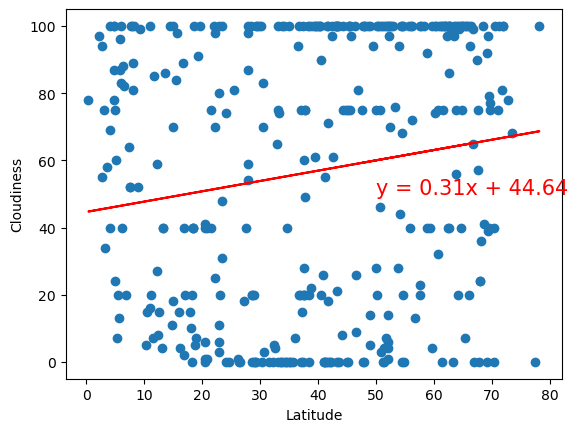

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.11855374031685605


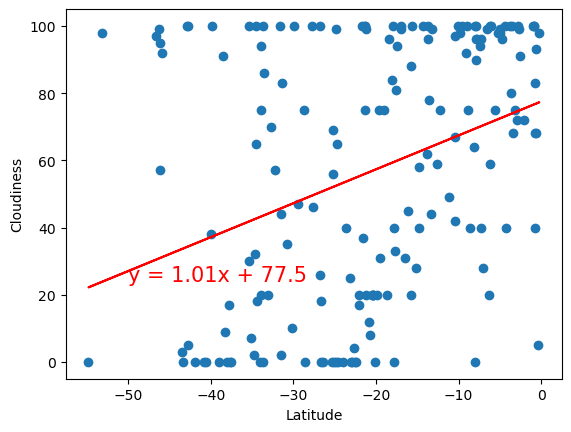

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,24),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [19]:
#NorthernHemisphere:
# a one-unit change in latitiude  (e.g., increase by 1 unit) results in a humidity increase of .31 units.
# the "Y" value of 44.64 indicates a fixed humidity of 44.64 when latitude equals zero.

#SouthernHemisphere:
# a one-unit change in latitude (e.g., increase by 1 unit) results in a humidity increase of 1.01 units.
# the "Y" value of 77.50 indicates a fixed humidity of 77.50 when latitude equals zero.

#The R^2 values of .02 and .11 indicates poor fits of the regression line through the data (i.e., latitude is a poor indicator of cloudiness).

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.014508624371306667


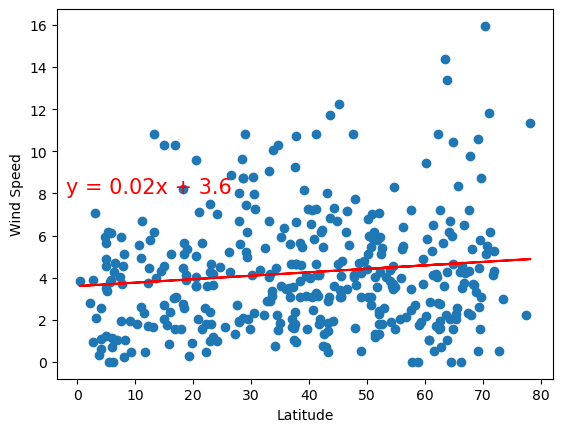

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-2,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.03598496450880455


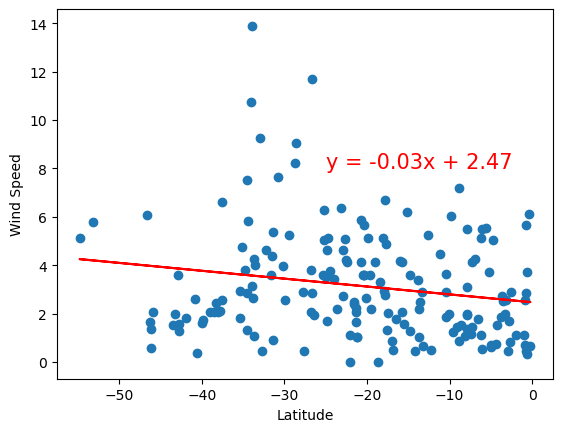

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [20]:
#NorthernHemisphere:
# a one-unit change in latitiude  (e.g., increase by 1 unit) results in a wind speed increase of .02 units.
# the "Y" value of 3.6 indicates a fixed wind speed of 3.6 when latitude equals zero.

#SouthernHemisphere:
# a one-unit change in latitude (e.g., increase by 1 unit) results in a wind speed decrease of .03 units.
# the "Y" value of 2.47 indicates a fixed humidity of 2.47 when latitude equals zero.

#The R^2 values of .01 and .03 indicates poor fits of the regression line through the data (i.e., latitude is a poor indicator of wind speed).